# 242 Project: Identify credit card frauds
# Data
## 1. Data Collection and Exploratory Data Analysis
### In this section, we loaded the transactions data, investigated the structure of the data (29 features and 786363 records in total) and reported basic summary statistics for each feature.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_json('transactions.txt', lines=True)
df.replace('', np.nan, inplace=True)
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,NaN,0.0,NaN,NaN,NaN,False,NaN,NaN,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,NaN,0.0,NaN,NaN,NaN,True,NaN,NaN,False,False


### Structure of the data:

In [2]:
"Number of records and fields: {0}, {1}".format(df.shape[0], df.shape[1])

'Number of records and fields: 786363, 29'

 basic summary statistics

In [3]:
summary_statistics = pd.DataFrame()
summary_statistics['count of null'] = df.isnull().sum()
summary_statistics['minimum'] = df.min()
summary_statistics['maximum'] = df.max()
summary_statistics['unique values'] = df.nunique()
summary_statistics

C:\Users\xintian.liu\AppData\Local\Temp\ipykernel_11648\2832248381.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summary_statistics['minimum'] = df.min()
C:\Users\xintian.liu\AppData\Local\Temp\ipykernel_11648\2832248381.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summary_statistics['maximum'] = df.max()


,count of null,minimum,maximum,unique values
accountNumber,0,100088067,999389635,5000
customerId,0,100088067,999389635,5000
creditLimit,0,250,50000,10
availableMoney,0,-1005.63,50000.0,521915
transactionDateTime,0,2016-01-01T00:01:02,2016-12-30T23:59:45,776637
transactionAmount,0,0.0,2011.54,66038
merchantName,0,1st BBQ,williamssonoma.com,2490
acqCountry,4562,NaN,NaN,4
merchantCountryCode,724,NaN,NaN,4
posEntryMode,4054,NaN,NaN,5


In [4]:
# drop the null field
df.drop(['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1, inplace=True)
df.reset_index(drop=True)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,...,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,...,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,...,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,...,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,...,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [5]:
#Key Numbers
fraud_count = (df['isFraud']==True).sum()
print('Total Frauds:', fraud_count)

fraud_amount = df[df['isFraud']==True]['transactionAmount'].sum()
fraud_avg_amount = fraud_amount/fraud_count
print('Average Fraud Amount:', fraud_avg_amount)

Totaltransaction_count = df.shape[0]
print('Total Transaction', Totaltransaction_count)

Total Frauds: 12417
Average Fraud Amount: 225.21590480792463
Total Transaction 786363


In [6]:
# MerchantCountryCode Overview

us_count = (df['merchantCountryCode'] == 'US').sum()
print('US percentage:', us_count/Totaltransaction_count)

us_fraud_count = (df[df['isFraud']==True]['merchantCountryCode'] == 'US').sum()
print('US fraud percentage:', us_fraud_count/us_count)

can_count = (df['merchantCountryCode'] == 'CAN').sum()
print('CAN percentage:', can_count/Totaltransaction_count)

can_fraud_count = (df[df['isFraud']==True]['merchantCountryCode'] == 'CAN').sum()
print('CAN fraud percentage:', can_fraud_count/can_count)

mex_count = (df['merchantCountryCode'] == 'MEX').sum()
print('MEX percentage:', mex_count/Totaltransaction_count)

mex_fraud_count = (df[df['isFraud']==True]['merchantCountryCode'] == 'MEX').sum()
print('MEX fraud percentage:', mex_fraud_count/mex_count)

pr_count = (df['merchantCountryCode'] == 'PR').sum()
print('PR percentage', pr_count/Totaltransaction_count)

pr_fraud_count = (df[df['isFraud']==True]['merchantCountryCode'] == 'PR').sum()
print('PR fraud percentage', pr_fraud_count/pr_count)


US percentage: 0.9900147896073442
US fraud percentage: 0.01565552702530857
CAN percentage: 0.0030850892018062905
CAN fraud percentage: 0.023083264633140973
MEX percentage: 0.003996881847187622
MEX fraud percentage: 0.02036271078587337
PR percentage 0.0019825449569727976
PR fraud percentage 0.01731879409878127


Transaction amount less than 1000 percentage 0.998788091504814
Transaction amount less than 1000: 785410
Transaction amount less than 700: 779739


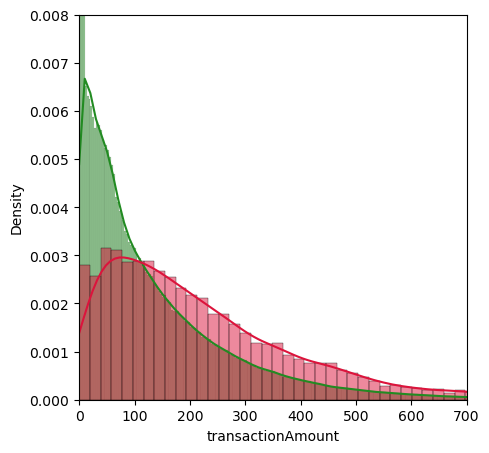

In [7]:
# Transaction Amount

tran_amount_less_than_1000_count = (df['transactionAmount'] <= 1000).sum()
print('Transaction amount less than 1000 percentage', tran_amount_less_than_1000_count/Totaltransaction_count)
print('Transaction amount less than 1000:', tran_amount_less_than_1000_count)

tran_amount_less_than_700_count = (df['transactionAmount'] <= 700).sum()
print('Transaction amount less than 700:', tran_amount_less_than_700_count)
# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
sns.histplot(df[df['isFraud']==0]['transactionAmount'], kde=True, stat="density", color = 'forestgreen')
sns.histplot(df[df['isFraud']==1]['transactionAmount'], kde=True, stat="density", color = 'crimson')

plt.ylim(top = 0.008)
plt.xlim(left = 0, right = 700)

plt.show
plt.savefig("./transactiondata_1.jpg")


#Comment: from the distribution, the faudulent amount is higher than those normal transactions.

### Numerical Features

<Figure size 1500x2000 with 0 Axes>

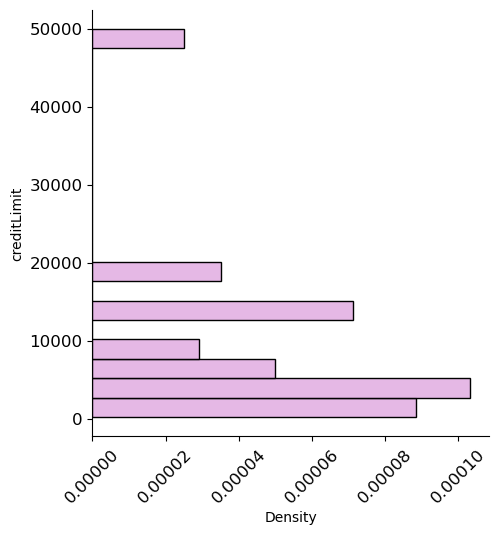

In [8]:
# creditLimit
import matplotlib.ticker as ticker
plt.figure(figsize=(15,20))

custom_palette = sns.color_palette(['red', 'green', 'blue'])
sns.displot(y='creditLimit', data = df, bins = 20, color = 'plum', stat = 'density')


plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('./creditlimitdata.jpg', bbox_inches = 'tight')

<Figure size 1500x2000 with 0 Axes>

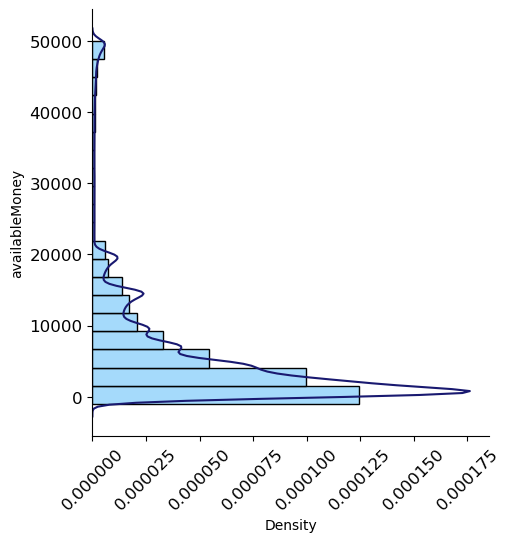

In [9]:
# availableMoney
plt.figure(figsize=(15,20))
ax = sns.displot(y='availableMoney', data = df, bins = 20,kde = False, color = 'lightskyblue', stat = 'density')
sns.kdeplot(data = df, y='availableMoney', color = 'midnightblue')#, ax = ax)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('./availableMoneydata.jpg', bbox_inches = 'tight')

<Figure size 1500x2000 with 0 Axes>

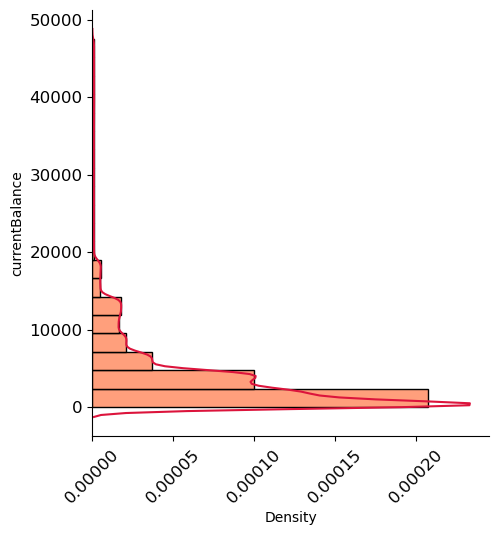

In [10]:
# currentBalance
plt.figure(figsize=(15,20))
ax = sns.displot(y='currentBalance', data = df, bins = 20,kde = False, color = 'coral', stat = 'density')
sns.kdeplot(data = df, y='currentBalance', color = 'crimson')#, ax = ax)
plt.xticks(rotation = 45, fontsize = 12)
plt.yticks(fontsize = 12)
plt.savefig('./currentBalance.jpg', bbox_inches = 'tight')

C:\Users\xintian.liu\AppData\Local\Temp\ipykernel_11648\3797625295.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.savefig('./correlation_transactionamount_currentbalance.jpg', bbox_inches = 'tight')
C:\Users\xintian.liu\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


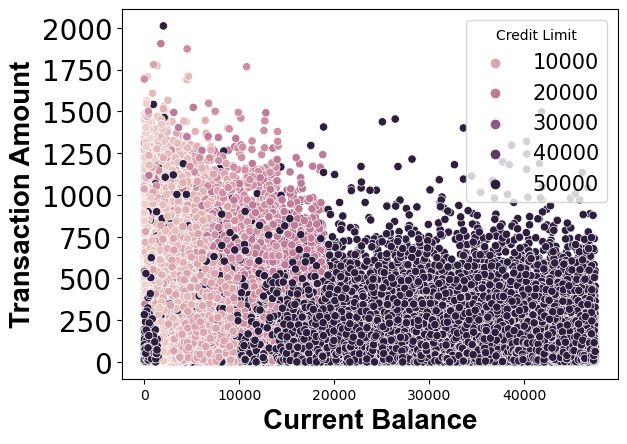

In [11]:
# Correlation
# plt.figure(figsize=(25,15))
sns.scatterplot(data=df, x='currentBalance', y='transactionAmount', hue='creditLimit')

plt.xlabel('Current Balance', fontsize = 20, fontname = 'Arial', weight = 'bold')
plt.ylabel('Transaction Amount', fontsize = 20, fontname = 'Arial', weight = 'bold')
plt.yticks(fontsize = 20)
plt.legend(title = 'Credit Limit', fontsize = 15)
plt.savefig('./correlation_transactionamount_currentbalance.jpg', bbox_inches = 'tight')

People with larger balances tend to have higher credit limits, while some people with extremley low current balance have the highest credit limits

### Categorical Features

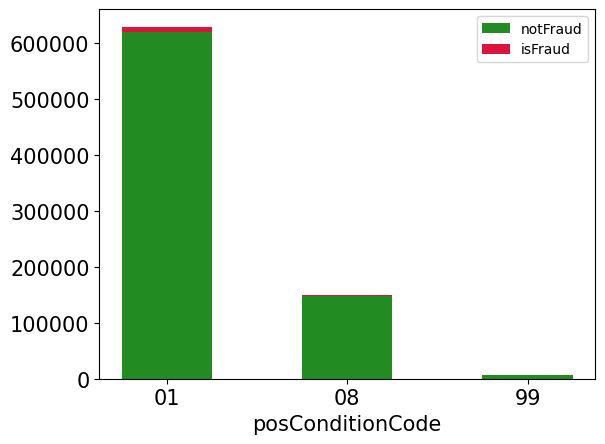

In [12]:
# posConditionCode
import matplotlib.pyplot as plt
colors = np.array(['forestgreen', 'crimson'])
posConditionCode = df.posConditionCode.unique()[:-1]
isFraud = []
notFraud = []
for code in posConditionCode:
    temp = df[df['posConditionCode'] == code]
    isFraud.append(len(temp[temp['isFraud'] == 1]))
    notFraud.append(len(temp[temp['isFraud'] == 0]))
counts = {
    "notFraud": notFraud,
    "isFraud": isFraud
} 
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(3)

i = 0
for boolean, count in counts.items():
    p = ax.bar(posConditionCode, count, width, label=boolean, bottom=bottom, color = colors[i])
    bottom += count
    i = i +1

#ax.set_title("posConditionCode")
ax.set_xlabel("posConditionCode", fontsize = 15)
ax.legend(loc="upper right")

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
#plt.show()
plt.savefig("./posconditioncode.jpg", bbox_inches = 'tight')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

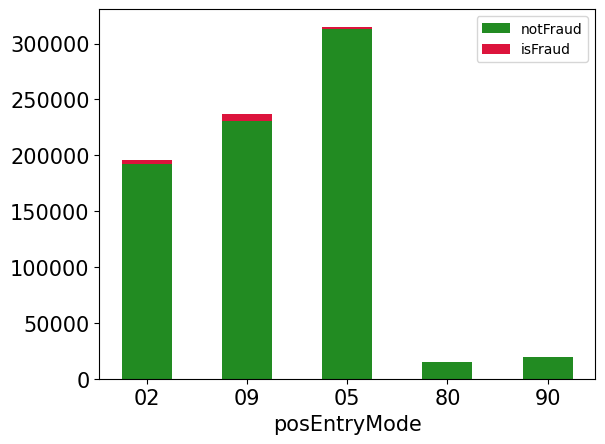

In [13]:
# posEntryMode
colors = np.array(['forestgreen', 'crimson'])
posEntryMode = df.posEntryMode.unique()[:-1]
isFraud = []
notFraud = []
for code in posEntryMode:
    temp = df[df['posEntryMode'] == code]
    isFraud.append(len(temp[temp['isFraud'] == 1]))
    notFraud.append(len(temp[temp['isFraud'] == 0]))
counts = {
    "notFraud": notFraud,
    "isFraud": isFraud
} 
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(len(posEntryMode))

i = 0
for boolean, count in counts.items():
    p = ax.bar(posEntryMode, count, width, label=boolean, bottom=bottom, color = colors[i])
    bottom += count
    i = i +1

ax.set_xlabel("posEntryMode", fontsize = 15)
ax.legend(loc="upper right")

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)


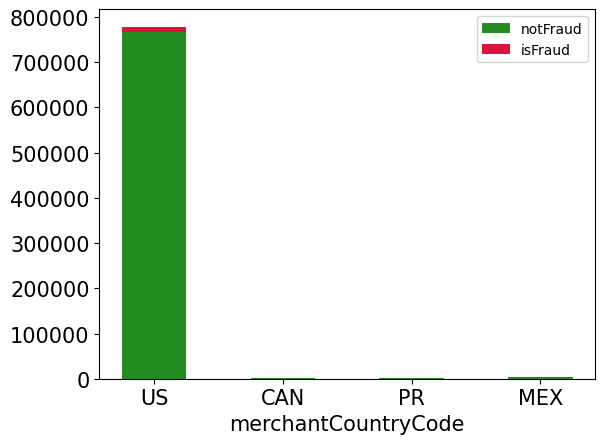

In [14]:
# merchantCountryCode
colors = np.array(['forestgreen', 'crimson'])
merchantCountryCode = ['US', 'CAN', 'PR', 'MEX']
isFraud = []
notFraud = []
for code in merchantCountryCode:
    temp = df[df['merchantCountryCode'] == code]
    isFraud.append(len(temp[temp['isFraud'] == 1]))
    notFraud.append(len(temp[temp['isFraud'] == 0]))
counts = {
    "notFraud": notFraud,
    "isFraud": isFraud
} 
width = 0.5

fig3, ax3 = plt.subplots()
bottom = np.zeros(len(merchantCountryCode))

i = 0
for boolean, count in counts.items():
    p = ax3.bar(merchantCountryCode, count, width, label=boolean, bottom=bottom, color = colors[i])
    bottom += count
    i = i +1

ax3.set_xlabel("merchantCountryCode", fontsize = 15)
ax3.legend(loc="upper right")

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

plt.savefig("./merchantCountryCode.jpg", bbox_inches = 'tight')

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

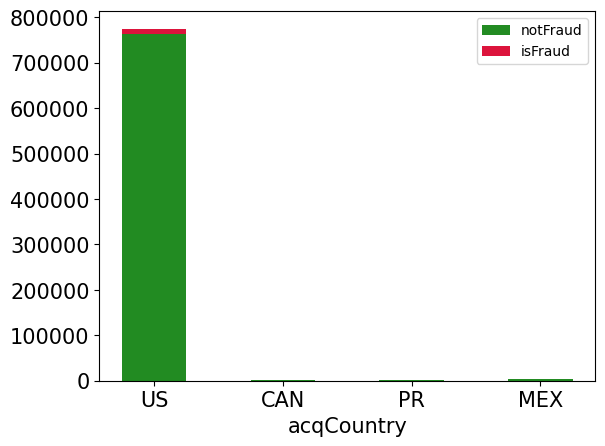

In [15]:
# acqCountry
colors = np.array(['forestgreen', 'crimson'])
acqCountry = ['US', 'CAN', 'PR', 'MEX']
isFraud = []
notFraud = []
for code in acqCountry:
    temp = df[df['acqCountry'] == code]
    isFraud.append(len(temp[temp['isFraud'] == 1]))
    notFraud.append(len(temp[temp['isFraud'] == 0]))
counts = {
    "notFraud": notFraud,
    "isFraud": isFraud
} 
width = 0.5

fig3, ax3 = plt.subplots()
bottom = np.zeros(len(acqCountry))

i = 0
for boolean, count in counts.items():
    p = ax3.bar(acqCountry, count, width, label=boolean, bottom=bottom, color = colors[i])
    bottom += count
    i = i +1

ax3.set_xlabel("acqCountry", fontsize = 15)
ax3.legend(loc="upper right")

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)


## 2. Feature Engineering: Define New Features

In [16]:
from datetime import datetime
df["correctCVV"] = df["cardCVV"] == df["enteredCVV"]

def getDays1(a,b):
  return (datetime.strptime(a, '%Y-%m-%dT%H:%M:%S')- datetime.strptime(b, '%Y-%m-%d')).days

def getDays2(a,b):
  return (datetime.strptime(a, '%Y-%m-%dT%H:%M:%S')- datetime.strptime(b, '%Y-%m-%d')).days

df["daysSinceOpen"] = df.apply(lambda x: getDays1(x['transactionDateTime'],x['accountOpenDate']), axis=1)
df["daysSinceAddressChange"] = df.apply(lambda x: getDays1(x['transactionDateTime'],x['dateOfLastAddressChange']), axis=1)


In [17]:
df["daysSinceOpen"].head()

0    518
1    577
2    605
3    637
4    231
Name: daysSinceOpen, dtype: int64

In [18]:
df["daysSinceAddressChange"].head()

0    518
1    577
2    605
3    637
4    231
Name: daysSinceAddressChange, dtype: int64

In [19]:
df['transactionAmountPercentage'] = df['transactionAmount'] / df['creditLimit']

In [20]:
df['transactionAmountPercentage'].head()

0    0.019710
1    0.014902
2    0.001494
3    0.001494
4    0.014236
Name: transactionAmountPercentage, dtype: float64

### Outputs of feature engineering

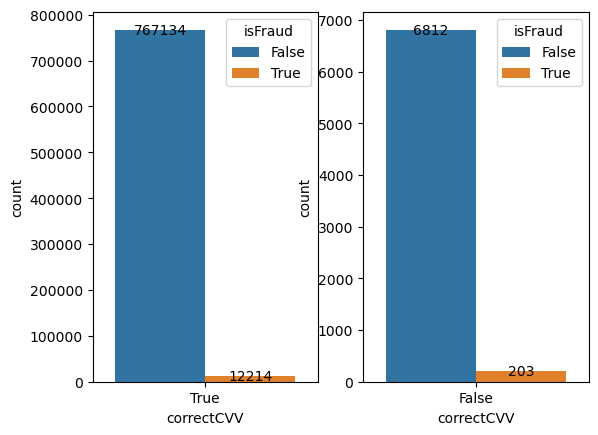

In [21]:
plt.subplot(1,2,1)

df_filter_correctCVV = df[df['correctCVV']==True]
ax1 = sns.countplot(data=df_filter_correctCVV, x='correctCVV', hue='isFraud')
for p in ax1.patches:
    ax1.annotate(
    #add text
    text = f"{p.get_height():1.0f}",
    #text position
    xy = (p.get_x() + p.get_width() / 2., p.get_height()),
    xycoords = 'data',
    ha = 'center',
    va = 'center',
    fontsize = 10,
    color = 'black'
    )
# plt.yscale('log')
plt.subplot(1,2,2)

df_filter_no_correctCVV = df[df['correctCVV']==False]
ax2 = sns.countplot(data=df_filter_no_correctCVV, x='correctCVV', hue='isFraud')
for p in ax2.patches:
    ax2.annotate(
    #add text
    text = f"{p.get_height():1.0f}",
    #text position
    xy = (p.get_x() + p.get_width() / 2., p.get_height()),
    xycoords = 'data',
    ha = 'center',
    va = 'center',
    fontsize = 10,
    color = 'black'
    )
    
plt.savefig('./correctCVV.jpg')

In [22]:
count_correct_CVV = (df['correctCVV']==True).sum()
print('correct CVV percentage:', count_correct_CVV/Totaltransaction_count)

correct CVV percentage: 0.9910791835322873


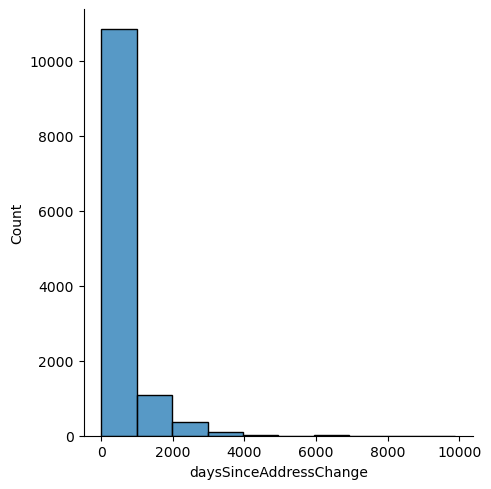

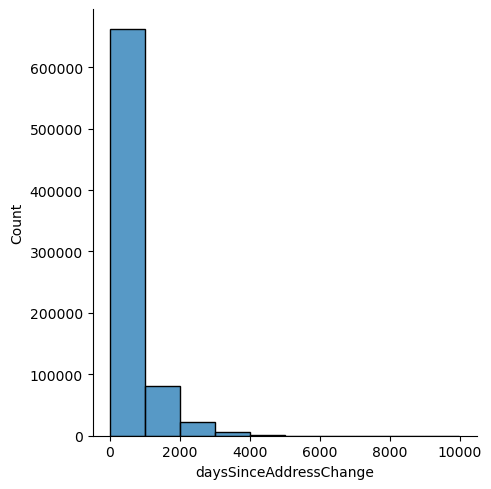

In [23]:
# daysSinceAddressChange: A brief look

# Plots in Google sheets

fraud_data = df[df['isFraud'] == 1]
non_fraud_data = df[df['isFraud'] == 0]

sns.displot(data = fraud_data, x = 'daysSinceAddressChange',bins = 10)
sns.displot(data = non_fraud_data, x = 'daysSinceAddressChange',bins = 10)
#plt.hist(non_fraud_data['daysSinceAddressChange'], alpha=0.25,bins=20, label='Non-fraud')


    
plt.show()

In [24]:
count_addresschange_0_1000_fraud = (fraud_data['daysSinceAddressChange']<1000).sum()
count_addresschange_0_1000_normal =(non_fraud_data['daysSinceAddressChange']<1000).sum()

count_addresschange_1000_2000_fraud =((1000 <= fraud_data['daysSinceAddressChange']) & (fraud_data['daysSinceAddressChange'] < 2000)).sum()
count_addresschange_1000_2000_normal =( (1000 <=non_fraud_data['daysSinceAddressChange'] ) & (non_fraud_data['daysSinceAddressChange'] < 2000)).sum()

count_addresschange_2000_3000_fraud =( (2000 <= fraud_data['daysSinceAddressChange'] )& (fraud_data['daysSinceAddressChange'] < 3000)).sum() 
count_addresschange_2000_3000_normal =((2000 <= non_fraud_data['daysSinceAddressChange']) & (non_fraud_data['daysSinceAddressChange']< 3000)).sum()

count_addresschange_3000_4000_fraud =( (3000 <= fraud_data['daysSinceAddressChange'] )& (fraud_data['daysSinceAddressChange'] < 4000)).sum() 
count_addresschange_3000_4000_normal =((3000 <= non_fraud_data['daysSinceAddressChange']) & (non_fraud_data['daysSinceAddressChange']< 4000)).sum()

count_addresschange_5000_fraud =( 5000 <= fraud_data['daysSinceAddressChange'] ).sum() 
count_addresschange_5000_normal =(5000 <= non_fraud_data['daysSinceAddressChange']).sum()


print('daysSinceAddressChange:')
print('0~1000, fraud, normal', count_addresschange_0_1000_fraud, count_addresschange_0_1000_normal)
print('1000~2000, fraud, normal', count_addresschange_1000_2000_fraud, count_addresschange_1000_2000_normal)
print('2000~3000, fraud, normal', count_addresschange_2000_3000_fraud, count_addresschange_2000_3000_normal)
print('3000~4000, fraud, normal', count_addresschange_3000_4000_fraud, count_addresschange_3000_4000_normal)
print('5000, fraud, normal', count_addresschange_5000_fraud, count_addresschange_5000_normal)

daysSinceAddressChange:
0~1000, fraud, normal 10862 661870
1000~2000, fraud, normal 1064 80792
2000~3000, fraud, normal 368 22916
3000~4000, fraud, normal 90 6594
5000, fraud, normal 11 256


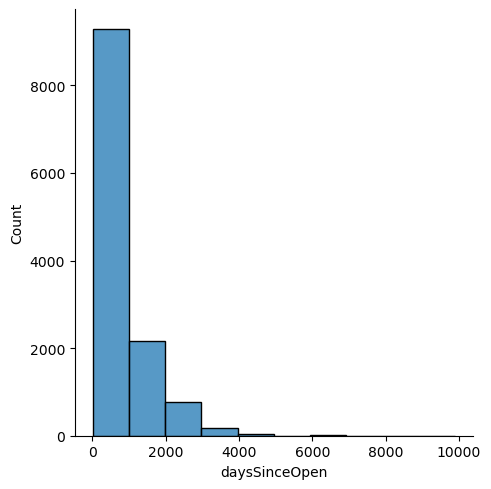

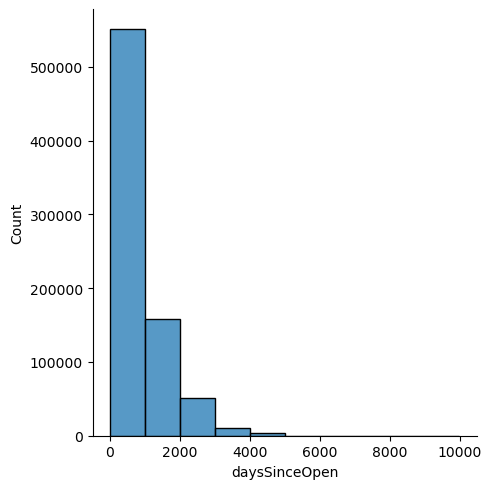

In [25]:
# DaysSinceOpen: A brief look

# Plots in Google sheets

sns.displot(data = fraud_data, x = 'daysSinceOpen',bins = 10)
sns.displot(data = non_fraud_data, x = 'daysSinceOpen',bins = 10)

plt.show()

In [26]:
# DaysSinceOpen
count_open_0_1000_fraud = (fraud_data['daysSinceOpen']<1000).sum()
count_open_0_1000_normal =(non_fraud_data['daysSinceOpen']<1000).sum()

count_open_1000_2000_fraud =((1000 <= fraud_data['daysSinceOpen']) & (fraud_data['daysSinceOpen'] < 2000)).sum()
count_open_1000_2000_normal =( (1000 <=non_fraud_data['daysSinceOpen'] ) & (non_fraud_data['daysSinceOpen'] < 2000)).sum()

count_open_2000_3000_fraud =( (2000 <= fraud_data['daysSinceOpen'] )& (fraud_data['daysSinceOpen'] < 3000)).sum() 
count_open_2000_3000_normal =((2000 <= non_fraud_data['daysSinceOpen']) & (non_fraud_data['daysSinceOpen']< 3000)).sum()

count_open_3000_4000_fraud =( (3000 <= fraud_data['daysSinceOpen'] )& (fraud_data['daysSinceOpen'] < 4000)).sum() 
count_open_3000_4000_normal =((3000 <= non_fraud_data['daysSinceOpen']) & (non_fraud_data['daysSinceOpen']< 4000)).sum()

count_open_5000_fraud =( 5000 <= fraud_data['daysSinceOpen'] ).sum() 
count_open_5000_normal =(5000 <= non_fraud_data['daysSinceOpen']).sum()

print('DaysSinceOpen:')
print('0~1000, fraud, normal', count_open_0_1000_fraud, count_open_0_1000_normal)
print('1000~2000, fraud, normal', count_open_1000_2000_fraud, count_open_1000_2000_normal)
print('2000~3000, fraud, normal', count_open_2000_3000_fraud, count_open_2000_3000_normal)
print('3000~4000, fraud, normal', count_open_3000_4000_fraud, count_open_3000_4000_normal)
print('>5000, fraud, normal', count_open_5000_fraud, count_open_5000_normal)

DaysSinceOpen:
0~1000, fraud, normal 9280 550959
1000~2000, fraud, normal 2173 158805
2000~3000, fraud, normal 752 50578
3000~4000, fraud, normal 173 10335
>5000, fraud, normal 11 256


# 3. Indentify Duplicate Transactions

In [27]:
# transfer to the datetime
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])

In [28]:
# identify reversed transactions
df['lasttransactionType'] = df.sort_values(['transactionDateTime']).groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionType'].shift(1)
df['reversed'] = (df['transactionType']=='REVERSAL') & (df['lasttransactionType']=='PURCHASE')


In [29]:
df[df['reversed']==True]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,correctCVV,daysSinceOpen,daysSinceAddressChange,transactionAmountPercentage,lasttransactionType,reversed
39,574788567,574788567,2500,2200.98,2016-05-24 01:38:03,215.13,Convenient Tire,US,US,09,...,299.02,True,False,False,True,224,224,0.086052,PURCHASE,True
101,924729945,924729945,50000,49831.43,2016-10-19 14:01:45,168.57,discount.com,US,US,05,...,168.57,False,False,False,False,817,817,0.003371,PURCHASE,True
133,984504651,984504651,50000,46367.41,2016-01-16 09:53:15,450.74,Planet Fitness #849960,US,US,05,...,3632.59,False,False,False,True,173,173,0.009015,PURCHASE,True
156,984504651,984504651,50000,41909.30,2016-01-25 20:39:15,81.73,AMC #724446,US,US,09,...,8090.70,True,False,False,True,182,182,0.001635,PURCHASE,True
181,984504651,984504651,50000,38090.70,2016-02-04 00:14:42,83.64,1st Sandwitch Bar #801388,US,US,09,...,11909.30,True,False,False,True,192,192,0.001673,PURCHASE,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786014,205026043,205026043,5000,1571.26,2016-09-18 06:08:02,56.26,Lyft,US,US,05,...,3428.74,False,False,False,True,3078,3078,0.011252,PURCHASE,True
786072,288358186,288358186,7500,7367.55,2016-08-28 11:21:32,20.66,ebay.com,US,US,09,...,132.45,False,False,False,True,738,738,0.002755,PURCHASE,True
786120,638498773,638498773,10000,9798.21,2016-01-01 19:48:03,201.79,KFC #928167,US,US,05,...,201.79,True,False,False,True,410,410,0.020179,PURCHASE,True
786219,638498773,638498773,10000,5331.33,2016-11-03 04:23:26,86.14,Dunkin' Donuts #396342,US,US,05,...,4668.67,True,False,False,True,717,717,0.008614,PURCHASE,True


In [30]:
Reverse_count = (df['reversed']==True).sum()
Reverse_money_count = df[df['reversed']==True]['transactionAmount'].sum()
print('total number of transactions for reversed transactions: ', Reverse_count)
print('total dollar amount for reversed transactions: ', Reverse_money_count)

total number of transactions for reversed transactions:  17840
total dollar amount for reversed transactions:  2670687.9


In [31]:
# identify multi-swipe transactions where the dollar amount of same customer ID should be the same, and transaction date time should be less than 2 minutes
df['multi-swipe'] = (df[df['transactionType']=='PURCHASE'].sort_values(['transactionDateTime'])
                     .groupby(['accountNumber', 'transactionAmount'], sort=False)['transactionDateTime']
                     .diff()
                     .dt.total_seconds()
                     .lt(120))


In [32]:
df[df['multi-swipe']==True]

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardPresent,expirationDateKeyInMatch,isFraud,correctCVV,daysSinceOpen,daysSinceAddressChange,transactionAmountPercentage,lasttransactionType,reversed,multi-swipe
263,984504651,984504651,50000,26680.99,2016-03-12 06:34:29,118.52,AMC #706324,US,US,02,...,True,False,False,True,229,229,0.002370,PURCHASE,False,True
281,984504651,984504651,50000,24316.12,2016-03-18 13:57:04,26.71,Planet Fitness #692929,US,US,02,...,True,False,False,True,235,235,0.000534,PURCHASE,False,True
339,984504651,984504651,50000,16503.49,2016-04-08 22:21:11,43.21,WSC #994275,US,US,02,...,False,False,False,True,256,13,0.000864,PURCHASE,False,True
461,984504651,984504651,50000,13054.71,2016-06-04 12:14:55,270.10,EZ Putt Putt #40513,US,US,05,...,True,False,False,True,313,30,0.005402,PURCHASE,False,True
494,984504651,984504651,50000,8438.80,2016-06-14 18:29:17,35.48,WSC #374789,US,US,05,...,False,False,False,True,323,40,0.000710,PURCHASE,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785758,207667444,207667444,7500,6893.70,2016-10-14 13:24:58,79.82,discount.com,US,US,02,...,False,False,False,True,1768,59,0.010643,PURCHASE,False,True
785915,428856030,428856030,250,104.44,2016-10-30 20:59:18,314.07,Rodeway Inn #438868,US,US,02,...,True,False,False,True,2631,2631,1.256280,PURCHASE,False,True
785983,205026043,205026043,5000,451.59,2016-06-07 22:29:11,391.94,Uber,US,US,09,...,False,False,False,True,2975,2975,0.078388,PURCHASE,False,True
785984,205026043,205026043,5000,433.52,2016-06-07 22:30:57,391.94,Uber,US,US,09,...,False,False,False,True,2975,2975,0.078388,PURCHASE,False,True


In [33]:
Multiswipe_count = (df['multi-swipe']==True).sum()
Multiswipe_money_count = df[df['multi-swipe']==True]['transactionAmount'].sum()
print('total number of transactions for the multi-swipe transactions: ', Multiswipe_count)
print('total dollar amount for the multi-swipe transactions: ', Multiswipe_money_count)

total number of transactions for the multi-swipe transactions:  4893
total dollar amount for the multi-swipe transactions:  738267.73


In [34]:
Reverse_per_account = ((df['reversed']==True).sum())/df[df['reversed']==True]['accountNumber'].nunique()
Multiswipe_per_account = ((df['multi-swipe']==True).sum())/df[df['multi-swipe']==True]['accountNumber'].nunique()
print('reversed transactions per account: ', Reverse_per_account)
print('multi-swipe transactions per account: ', Multiswipe_per_account)

reversed transactions per account:  6.177285318559557
multi-swipe transactions per account:  3.1365384615384615


In [35]:
Reverse_money_avg = df[df['reversed']==True]['transactionAmount'].sum()/(df['reversed']==True).sum()
Multiswipe_money_avg = df[df['multi-swipe']==True]['transactionAmount'].sum()/(df['multi-swipe']==True).sum()
print('average reversed transaction amount: ', Reverse_money_avg)
print('average multi-swipe transaction amount: ', Multiswipe_money_avg)

average reversed transaction amount:  149.7022365470852
average multi-swipe transaction amount:  150.88243000204372


Summary: the total number of reversed transactions and the number of reversed transactions per account are more than those of multi-swipe transactions, but the average amount for either kind of transaction is almost same

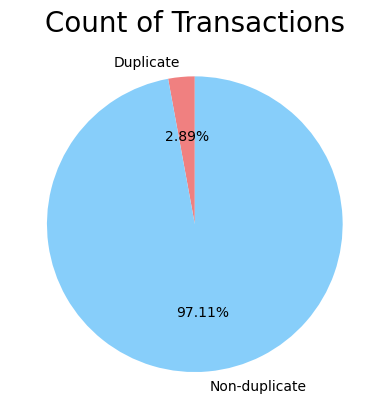

In [36]:
Totaltransaction_count = df.shape[0]
# Plot pie chart
Duplicate_count = Reverse_count + Multiswipe_count
Nonduplicate_count = Totaltransaction_count - Duplicate_count
count = [Duplicate_count, Nonduplicate_count]
labels = ['Duplicate','Non-duplicate']
colors = ['lightcoral', 'lightskyblue']
plt.pie(count, labels = labels, colors = colors, autopct='%1.2f%%', startangle=90)
plt.title('Count of Transactions', fontsize = 20)
plt.savefig('./Count_of_Transaction_Pie.jpg')

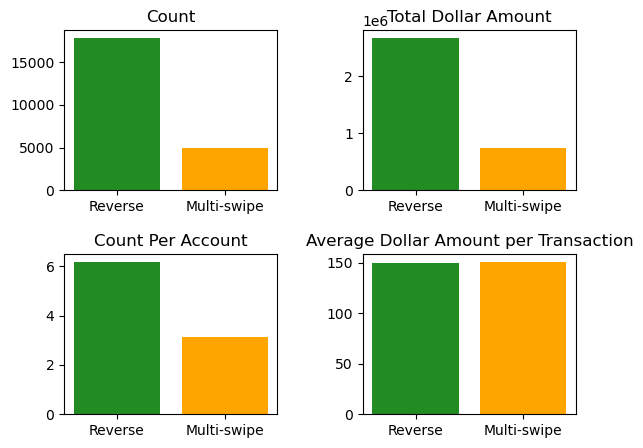

In [37]:
# Plot comparison between reverse and multiswipe
#plot1
tick_label = ['Reverse', 'Multi-swipe']
colors = ['forestgreen','orange']
count_re_mu = [Reverse_count, Multiswipe_count]
plt.subplot(2,2,1)
plt.bar(range(len(count_re_mu)), count_re_mu, tick_label = tick_label, color = colors)
plt.title('Count')

money_count_re_mu = [Reverse_money_count, Multiswipe_money_count]
plt.subplot(2,2,2)
plt.bar(range(len(money_count_re_mu)), money_count_re_mu, tick_label = tick_label, color = colors)
plt.title('Total Dollar Amount')

tran_per_account_re_mu = [Reverse_per_account, Multiswipe_per_account]
plt.subplot(2,2,3)
plt.bar(range(len(tran_per_account_re_mu)), tran_per_account_re_mu, tick_label = tick_label, color = colors)
plt.title('Count Per Account')
 
Money_avg_re_mu = [Reverse_money_avg, Multiswipe_money_avg]
plt.subplot(2,2,4)
plt.bar(range(len(Money_avg_re_mu)), Money_avg_re_mu, tick_label = tick_label, color = colors)
plt.title('Average Dollar Amount per Transaction')
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                     right=0.9,
                     top=0.9,
                     wspace=0.4,
                     hspace=0.4)
plt.savefig('./Reverse_Multiswipe_Bar.jpg')

# Model

## Data Preprocessing

In [38]:
# drop duplicated transactions
duplicated = df[(df['reversed']==True) | (df['multi-swipe']==True)].index
df.drop(duplicated, inplace=True)
df.drop(['reversed','multi-swipe','lasttransactionType'], axis=1, inplace=True)

In [39]:
# replace false/true with 0/1
df.replace({False: 0, True: 1}, inplace=True)
df


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,correctCVV,daysSinceOpen,daysSinceAddressChange,transactionAmountPercentage
0,737265056,737265056,5000,5000.00,2016-08-13 14:27:32,98.55,Uber,US,US,02,...,1803,PURCHASE,0.00,0,0,0,1,518,518,0.019710
1,737265056,737265056,5000,5000.00,2016-10-11 05:05:54,74.51,AMC #191138,US,US,09,...,767,PURCHASE,0.00,1,0,0,1,577,577,0.014902
2,737265056,737265056,5000,5000.00,2016-11-08 09:18:39,7.47,Play Store,US,US,09,...,767,PURCHASE,0.00,0,0,0,1,605,605,0.001494
3,737265056,737265056,5000,5000.00,2016-12-10 02:14:50,7.47,Play Store,US,US,09,...,767,PURCHASE,0.00,0,0,0,1,637,637,0.001494
4,830329091,830329091,5000,5000.00,2016-03-24 21:04:46,71.18,Tim Hortons #947751,US,US,02,...,3143,PURCHASE,0.00,1,0,0,1,231,231,0.014236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22 18:44:12,119.92,Lyft,US,US,90,...,3783,PURCHASE,1095.04,0,0,0,1,1582,1582,0.002398
786359,732852505,732852505,50000,48785.04,2016-12-25 16:20:34,18.89,hulu.com,US,US,09,...,3388,PURCHASE,1214.96,0,0,0,1,1585,1585,0.000378
786360,732852505,732852505,50000,48766.15,2016-12-27 15:46:24,49.43,Lyft,US,US,02,...,3783,PURCHASE,1233.85,0,0,0,1,1587,1587,0.000989
786361,732852505,732852505,50000,48716.72,2016-12-29 00:30:55,49.89,walmart.com,US,US,09,...,3388,PURCHASE,1283.28,0,0,0,1,1589,1589,0.000998


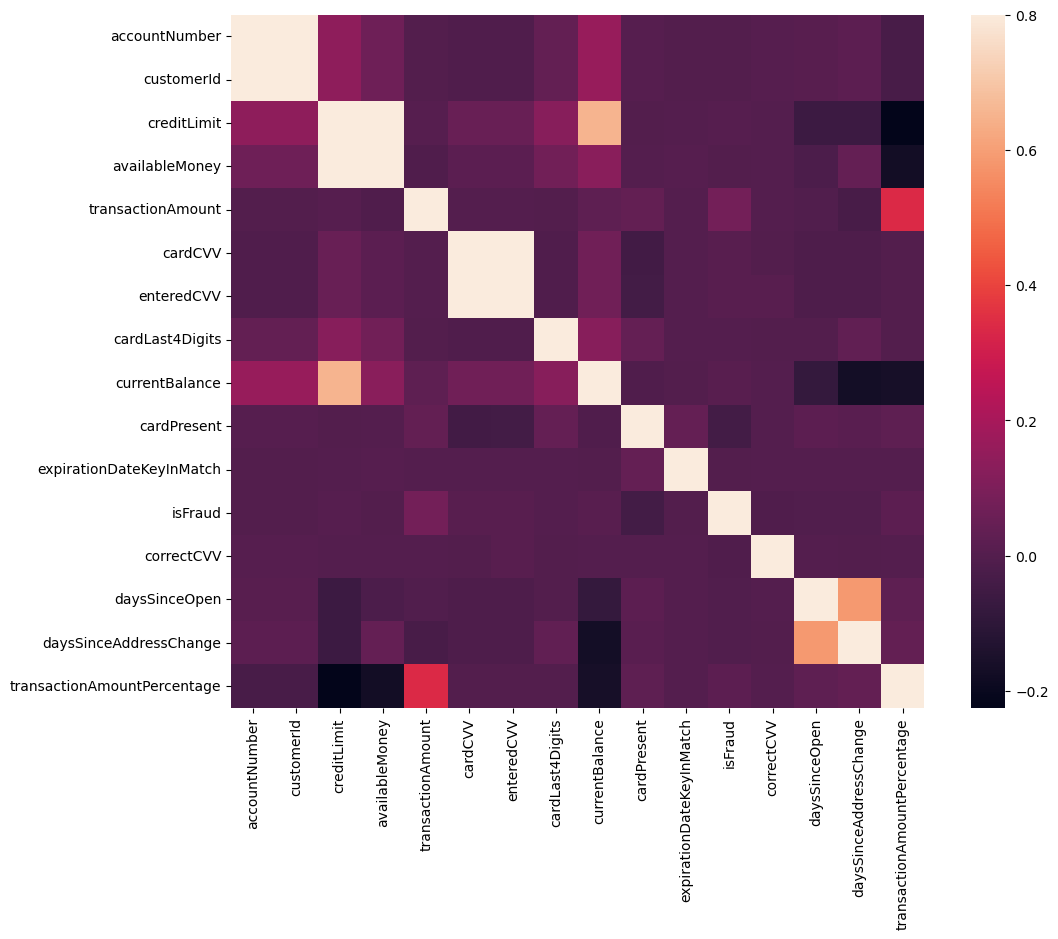

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

From the correlation table, we can see that isFraud is related to transactionAmount

In [41]:
# drop useless features
df.drop(['cardLast4Digits',
         'merchantName',
         'accountOpenDate',
         'transactionDateTime',
         'currentExpDate',
         'customerId',
         'dateOfLastAddressChange',
         'accountNumber',
         'enteredCVV',
         'cardCVV',
         ], inplace=True, axis=1)
df.head()

,creditLimit,availableMoney,transactionAmount,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud,correctCVV,daysSinceOpen,daysSinceAddressChange,transactionAmountPercentage
0,5000,5000.0,98.55,US,US,02,01,rideshare,PURCHASE,0.0,0,0,0,1,518,518,0.019710
1,5000,5000.0,74.51,US,US,09,01,entertainment,PURCHASE,0.0,1,0,0,1,577,577,0.014902
2,5000,5000.0,7.47,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,0,1,605,605,0.001494
3,5000,5000.0,7.47,US,US,09,01,mobileapps,PURCHASE,0.0,0,0,0,1,637,637,0.001494
4,5000,5000.0,71.18,US,US,02,01,fastfood,PURCHASE,0.0,1,0,0,1,231,231,0.014236


In [43]:
# use undersampling to counteract class imbalance
from imblearn.under_sampling import RandomUnderSampler
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

<AxesSubplot:xlabel='isFraud', ylabel='count'>

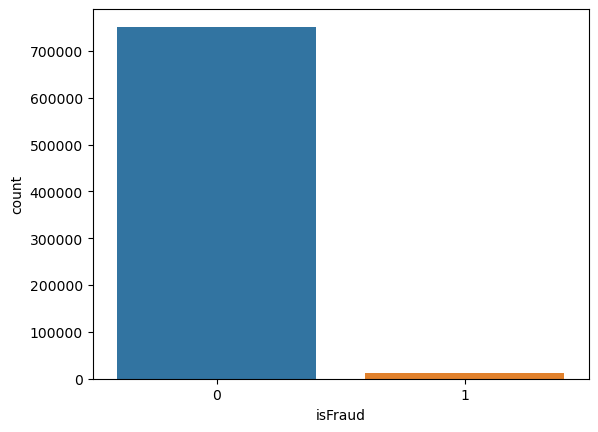

In [44]:
sns.countplot(x='isFraud', data=df)

the data sample is imbalanced, if we use this dataset as train dataset, the classification model will assume that in most cases there are no frauds, which is a baseline model. So we need to balance the number of true and false sample.

In [45]:
# create sub sample
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('True Sample:', (y==1).sum(), 'False Sample:', (y==0).sum())
print('After Random Under Sampling:')
print('True Sample:', (y_res==1).sum(), 'False Sample:', (y_res==0).sum())

True Sample: 12039 False Sample: 751591
After Random Under Sampling:
True Sample: 12039 False Sample: 12039


In [46]:
# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.2, random_state = 88)

In [47]:
cols_numeric = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
cols_category = ['acqCountry','merchantCountryCode','posEntryMode','posConditionCode','transactionType','cardPresent','expirationDateKeyInMatch']

In [48]:
# encoding the category virables to dummy variable
X_train_enc = pd.get_dummies(X_train, drop_first=True)
X_test_enc = pd.get_dummies(X_test, drop_first=True)

## Model Training and Testing

### Logistic Regression Model

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
            'penalty': ['l2', 'none'],
            'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100],
            'fit_intercept': [True, False],
            'n_jobs': [-1]
        }
LogReg = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=5, verbose=1)
LogReg.fit(X_train_enc, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 10, 100],
                         'fit_intercept': [True, False], 'n_jobs': [-1],
                         'penalty': ['l2', 'none']},
             verbose=1)

the accuracy of Logistic Regression model 0.6629983388704319


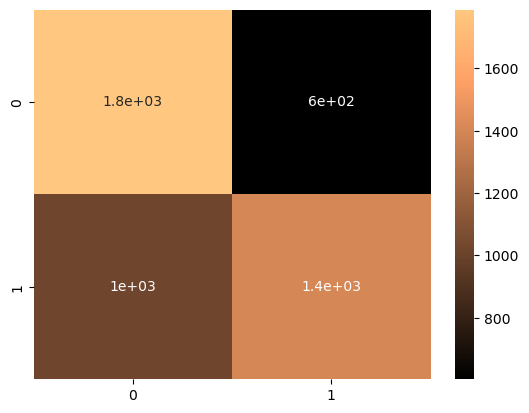

In [50]:
from sklearn.metrics import confusion_matrix

y_pred_log = LogReg.best_estimator_.predict(X_test_enc)
cm = confusion_matrix(y_test, y_pred_log)
sns.heatmap(cm, annot=True, cmap=plt.cm.copper)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print("the accuracy of Logistic Regression model", acc)

log_acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
log_TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
log_FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
log_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])

### Decision Tree Model

In [51]:
from sklearn.tree import DecisionTreeClassifier

params = {
            'max_depth': [3, 5, 7],
            'min_samples_leaf': [1, 3, 5, 7],
            'max_leaf_nodes': [None, 3, 5, 7]
        }

dtc = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params, cv=5, verbose=3)
dtc.fit(X_train_enc, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.647 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.658 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.655 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=1;, score=0.670 total time=   0.0s
[CV 1/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3;, score=0.647 total time=   0.0s
[CV 3/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3;, score=0.658 total time=   0.0s
[CV 4/5] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3;, score=0.655 total time=   0.0s
[CV 5/5] END max_depth=3, max_leaf_nodes=None, 

[CV 1/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3;, score=0.679 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3;, score=0.664 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3;, score=0.680 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3;, score=0.664 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=3;, score=0.678 total time=   0.0s
[CV 1/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5;, score=0.679 total time=   0.0s
[CV 2/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5;, score=0.664 total time=   0.0s
[CV 3/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5;, score=0.681 total time=   0.0s
[CV 4/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5;, score=0.664 total time=   0.0s
[CV 5/5] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=5;, score=0.678 total time=   0.0s
[CV 1/5] E

[CV 3/5] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=5;, score=0.681 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=5;, score=0.673 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=5;, score=0.685 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=7;, score=0.683 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=7;, score=0.663 total time=   0.0s
[CV 3/5] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=7;, score=0.681 total time=   0.0s
[CV 4/5] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=7;, score=0.674 total time=   0.0s
[CV 5/5] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=7;, score=0.686 total time=   0.0s
[CV 1/5] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=1;, score=0.669 total time=   0.0s
[CV 2/5] END max_depth=7, max_leaf_nodes=3, min_samples_leaf=1;, score=0.647 total time=   0.0s
[CV 3/5] END max

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'max_leaf_nodes': [None, 3, 5, 7],
                         'min_samples_leaf': [1, 3, 5, 7]},
             verbose=3)

the accuracy of Decision Tree model 0.6951827242524917


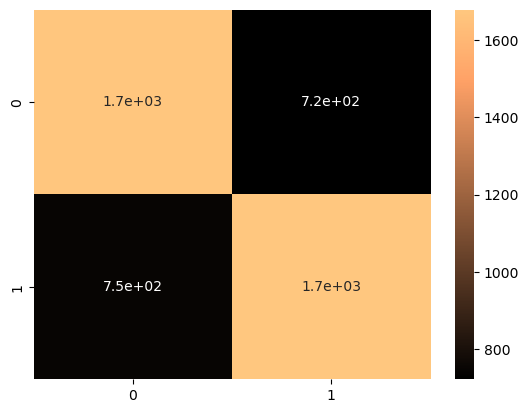

In [52]:
y_pred_dtc = dtc.best_estimator_.predict(X_test_enc)
cm = confusion_matrix(y_test, y_pred_dtc)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print("the accuracy of Decision Tree model", acc)
sns.heatmap(cm, annot=True, cmap=plt.cm.copper)

dtc_acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
dtc_TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
dtc_FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
dtc_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

params = {
            'n_estimators': [10, 50, 100, 300, 500],
            'max_depth': [1, 3, 5],
            'bootstrap': [True, False],
            'max_features': ['auto', 'sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'oob_score': [True, False]
        }

rf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=5, verbose=3)
rf.fit(X_train_enc, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.640 total time=   0.1s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.647 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.604 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.654 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.629 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.661 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.617 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.656 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.651 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.629 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.654 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.631 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.621 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.640 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.659 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.636 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.671 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.655 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.665 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.653 total time=   0

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.610 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.651 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.647 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.625 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.616 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.624 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.640 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.672 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.649 total t

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.639 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.663 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.655 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.637 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.666 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.631 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.667 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.646 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.657 total time=   

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.649 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.664 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.666 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.624 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.590 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.637 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.662 total time=   0.4s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.653 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.650 total time=   

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.641 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.658 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.652 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.630 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.625 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.659 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.649 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.660 total time=   0.1s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.646 total tim

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.628 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.651 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.613 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.637 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.635 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.594 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.618 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.659 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.641 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.642 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.627 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.647 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.638 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.640 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.645 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.597 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.659 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.656 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.651 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.618 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.647 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.625 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.647 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.660 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.594 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.640 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.659 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.666 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.650 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.627 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.638 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.650 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.627 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.651 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.652 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.654 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.642 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.638 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.616 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.615 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.646 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.646 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.638 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.644 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.624 total time=   

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.652 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.634 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.638 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.670 total time=   0.1s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.655 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.660 total ti

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.628 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.624 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.655 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.650 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.649 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.624 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.649 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.630 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.575 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.644 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.671 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.649 total time=   0.1s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.666 total time=   

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.662 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.641 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.642 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.641 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.635 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.649 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.654 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.668 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.690 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.654 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.674 total time=   

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.658 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.665 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.675 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.666 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.654 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.654 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.677 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.660 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.657 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.660 total t

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.666 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.660 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.671 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.682 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.656 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.678 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.678 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.640 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.657 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.675 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.660 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.671 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.684 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.658 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.671 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.661 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.661 total t

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.666 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.673 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.673 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.660 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.655 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.644 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.671 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.679 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.660 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.658 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.674 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.666 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.682 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.655 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.682 total ti

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.664 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.668 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.657 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.659 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.656 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.667 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.684 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.655 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.669 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.673 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.660 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.671 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.655 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.651 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.679 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.682 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.661 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.668 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.677 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.665 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.673 total time=   

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.655 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.660 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.684 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.644 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.659 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.665 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.664 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.654 total t

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.655 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.676 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.652 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.658 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.658 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.668 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.644 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.652 total time=  

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do no

[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.667 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.663 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.656 total t

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.684 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.665 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.669 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.656 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.693 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.690 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.677 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.668 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.681 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.685 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.687 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.680 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.666 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.684 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.683 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.679 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.689 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.692 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.669 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.680 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.673 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.684 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.688 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.684 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.676 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.678 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.660 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.666 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.689 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.682 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.672 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.674 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.666 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.690 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.687 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.674 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.667 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.677 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.689 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.690 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.670 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.674 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.671 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.685 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.676 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.659 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.676 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.684 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.646 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.656 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.691 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.682 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.665 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.677 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.686 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.685 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.693 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.674 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.674 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.678 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.687 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.657 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.691 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.684 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.686 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.678 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.669 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.671 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.682 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.655 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.685 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.674 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.671 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.678 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.679 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.683 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=0.694 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.679 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.666 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.677 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.684 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.692 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.677 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.659 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.679 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.684 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.678 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.679 total 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.658 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.670 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.666 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=True;, score=0.681 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.685 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.673 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.679 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.666 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=True;, score=0.689 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.676 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.683 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.678 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=0.685 total time= 

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.679 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.674 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=True;, score=0.690 total time=   0.0s


C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.685 total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.683 total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=0.683 total 

[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.646 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   

[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.606 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[

[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.637 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.615 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=

[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.628 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.660 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0

[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.659 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.646 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.620 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   

[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.630 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total ti

[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.647 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.656 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   

[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.618 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.621 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.640 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   

[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.645 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.659 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total ti

[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.644 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0

[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.613 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0

[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.632 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.593 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.618 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total ti

[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.620 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.642 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.649 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=

[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.644 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.610 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.646 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.655 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total ti

[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.611 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total ti

[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.623 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.643 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   

[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.637 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.629 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.642 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.658 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=

[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.614 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.656 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=1, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total ti

[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.641 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.651 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.675 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   

[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.653 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.657 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=

[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.675 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.654 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.668 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.659 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.666 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.655 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.673 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.652 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.671 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=

[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.644 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.643 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.675 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=

[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.652 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.666 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.671 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total

[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.650 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.645 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.661 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=

[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.641 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.642 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.671 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.679 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.657 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.671 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.657 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.681 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.681 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.653 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.671 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.650 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.663 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total ti

[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.649 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.654 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=

[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.679 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.671 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.659 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.667 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.658 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.656 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.648 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=

[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.679 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.659 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.669 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.651 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.669 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.657 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.676 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.654 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.671 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.671 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.643 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.678 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.651 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.640 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.671 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.652 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.644 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.662 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.685 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.667 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.670 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.667 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.681 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.678 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.672 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.683 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.672 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.679 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.684 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.663 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.673 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.668 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.684 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.684 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.664 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.680 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.667 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.681 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.682 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.664 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.678 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.675 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.680 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.669 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.683 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.671 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.690 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.685 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.672 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.678 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.675 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.683 total time=   0.1s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.685 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.667 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.685 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.665 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.679 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total ti

[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.682 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.662 total time=   0.1s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.669 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.666 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.686 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.682 total time=   0.1s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.683 total time=   0.1s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.662 total time=   0.1s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total ti

[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.668 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.683 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=

[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.682 total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.662 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.679 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan to

[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.660 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.686 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=

[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.656 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=

[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.661 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.679 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.667 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.675 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total

[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.664 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.675 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=10, oob_score=False;, score=0.681 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, oob_score=True;, score=nan total time=

[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.672 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.670 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=10, oob_score=False;, score=0.680 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=50, oob_score=True;, score=nan total time=

[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.665 total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.669 total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.674 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=10, oob_score=False;, score=0.677 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=50, oob_score=True;, score=nan total

C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1350 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1350 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\xintian.liu\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 411, in fit
    raise ValueError("Out of bag estimation only available if bootstrap=True")
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn(some_fits_failed_message,

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [1, 3, 5],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 300, 500],
                         'oob_score': [True, False]},
             verbose=3)

the accuracy of Random Forest model 0.6908222591362126


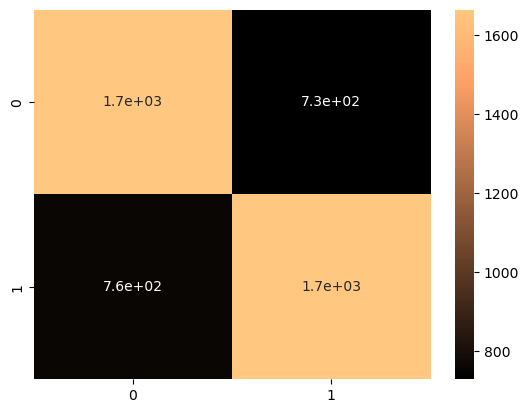

In [54]:
y_pred_rf = rf.best_estimator_.predict(X_test_enc)
cm = confusion_matrix(y_test, y_pred_rf)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print("the accuracy of Random Forest model", acc)
sns.heatmap(cm, annot=True, cmap=plt.cm.copper)

rf_acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
rf_TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
rf_FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
rf_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])

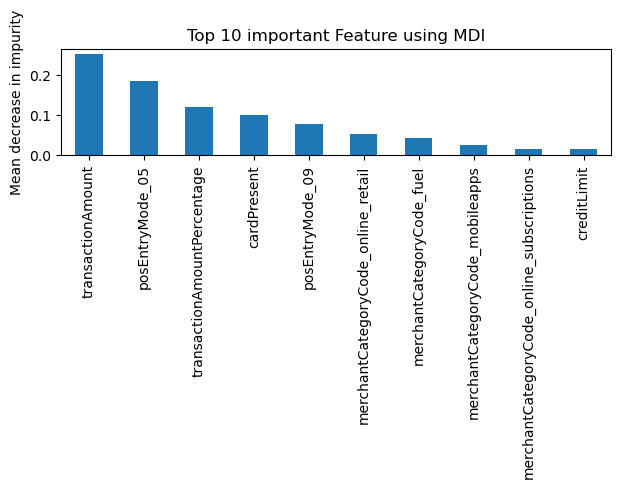

In [55]:
forest_importances = pd.Series(rf.best_estimator_.feature_importances_, index=X_train_enc.columns)
forest_importances.sort_values(ascending=False, inplace=True)

fig, ax = plt.subplots()
forest_importances[:10].plot.bar()
ax.set_title("Top 10 important Feature using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

From the bar plot, we can see these features are correlated to fraudulence

### Xgboost

In [57]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

params = {
            'n_estimators': [500],
            'max_depth': [1, 3, 5],
            'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.5, 0.7, 0.9],
            'reg_alpha': [0.01, 0.05, 0.07, 0.09, 0.5, 1],
            'reg_lambda': [0.01, 0.05, 0.07, 0.09, 0.5, 1],
            'n_jobs': [-1]
        }
xgb = GridSearchCV(estimator=XGBClassifier(booster='gbtree'), param_grid=params, cv=5, verbose=3)
xgb.fit(X_train_enc, y_train)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.638 total time=   0.8s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.613 total time=   0.8s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.624 total time=   0.8s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.649 total time=   0.8s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.659 total time=   0.7s
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.05;, score=0.638 total time=   0.8s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.0

[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.649 total time=   0.9s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.659 total time=   1.0s
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.638 total time=   1.0s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.613 total time=   1.0s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.624 total time=   1.1s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.649 total time=   1.0s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.659 total time=   0.9s
[CV 1/5] END learni

[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.624 total time=   0.8s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.649 total time=   0.7s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.659 total time=   0.7s
[CV 1/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.01;, score=0.638 total time=   0.8s
[CV 2/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.01;, score=0.613 total time=   0.7s
[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.01;, score=0.624 total time=   0.7s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.01;, score=0.649 total time=   0.7s
[CV 5/5] END learning_rate

[CV 3/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.624 total time=   1.0s
[CV 4/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.649 total time=   0.9s
[CV 5/5] END learning_rate=0.001, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.659 total time=   1.1s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.682 total time=   1.9s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.656 total time=   2.2s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.676 total time=   2.5s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.658 total time=   2.5s
[CV 5/5] END learning_rate=0.00

[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.656 total time=   2.6s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.676 total time=   2.5s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.658 total time=   2.4s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.668 total time=   2.4s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.682 total time=   2.3s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.656 total time=   2.1s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.676 total time=   2.3s
[CV 4/5] END learning_rat

[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.682 total time=   2.0s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.656 total time=   2.2s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.676 total time=   2.1s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.658 total time=   2.1s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.668 total time=   2.0s
[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.01;, score=0.682 total time=   2.1s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.5, reg_lambda=0.01;, score=0.656 total time=   2.1s
[CV 3/5] END learning_rate=0.0

[CV 1/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.682 total time=   2.1s
[CV 2/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.656 total time=   2.1s
[CV 3/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.676 total time=   2.1s
[CV 4/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.658 total time=   2.1s
[CV 5/5] END learning_rate=0.001, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.668 total time=   2.3s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.686 total time=   3.6s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.01, reg_lambda=0.01;, score=0.663 total time=   3.3s
[CV 3/5] END learning_rate=0.001, max_depth

[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.687 total time=   4.0s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.684 total time=   3.7s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.663 total time=   3.6s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.681 total time=   4.8s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.671 total time=  10.8s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.687 total time=51.7min
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.07, reg_lambda=0.01;, score=0.686 total time=   4.3s
[CV 2/5] END learning_rate=0.

[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.671 total time=   3.2s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.687 total time=   3.1s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.684 total time=   3.1s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.663 total time=   3.2s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.681 total time=   3.3s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.671 total time=   3.1s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.687 total time=   3.1s
[CV 1/5] END learning_rate=0.0

[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.672 total time=   3.4s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.686 total time=   3.4s
[CV 1/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.685 total time=   3.3s
[CV 2/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.665 total time=   3.5s
[CV 3/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.682 total time=   3.5s
[CV 4/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.672 total time=   3.3s
[CV 5/5] END learning_rate=0.001, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.686 total time=   3.3s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_est

[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.674 total time=   0.8s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.663 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.676 total time=   0.8s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.677 total time=   0.9s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.655 total time=   1.0s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.675 total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.663 total time=   1.0s
[CV 5/5] END learning_rate=0.01, ma

[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.655 total time=   0.8s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.674 total time=   0.8s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.663 total time=   0.8s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.676 total time=   0.8s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.677 total time=   0.8s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.655 total time=   0.9s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.675 total time=   1.0s
[CV 4/5] END learning_rate=0.01, 

[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.655 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.675 total time=   1.1s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.663 total time=   1.1s
[CV 5/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.676 total time=   1.1s
[CV 1/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.677 total time=   1.0s
[CV 2/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.655 total time=   1.1s
[CV 3/5] END learning_rate=0.01, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.674 total time=   1.0s
[CV 4/5] END learning_rate=0.01, max_depth=1, n_estima

[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.688 total time=   3.6s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.670 total time=   3.0s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.691 total time=   2.4s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.677 total time=   2.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.684 total time=   3.8s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.688 total time=   4.8s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.671 total time=   2.6s
[CV 3/5] END learning_rate=0.01

[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.683 total time=   2.3s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.688 total time=   2.2s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.670 total time=   2.3s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.690 total time=   2.5s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.677 total time=   2.4s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.683 total time=   2.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=1;, score=0.689 total time=   2.4s
[CV 2/5] END learning_rate=0

[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.684 total time=   1.7s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.688 total time=   1.7s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.670 total time=   1.9s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.688 total time=   1.9s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.677 total time=   1.6s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.682 total time=   1.6s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=1;, score=0.688 total time=   1.6s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_e

[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.698 total time=  13.4s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.697 total time=  11.8s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.678 total time=  16.6s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.696 total time=  14.6s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.680 total time=  13.5s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.699 total time=   8.9s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1;, score=0.695 total time=   8.4s
[CV 2/5] END learning_rate=0

[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.680 total time=   5.7s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.698 total time=   6.5s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.697 total time=   5.9s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.678 total time=   6.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.694 total time=   5.1s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.681 total time=   4.8s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.699 total time=   4.8s
[CV 1/5] END learning_rat

[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.680 total time=   3.6s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.701 total time=   3.5s
[CV 1/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.695 total time=   3.9s
[CV 2/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.680 total time=   3.8s
[CV 3/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.695 total time=   4.0s
[CV 4/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.680 total time=   3.6s
[CV 5/5] END learning_rate=0.01, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.700 total time=   3.8s
[CV 1/5] END learning_rate=0.01, max_depth=5, 

[CV 4/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.676 total time=   1.2s
[CV 5/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.685 total time=   1.3s
[CV 1/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.682 total time=   1.0s
[CV 2/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.664 total time=   0.9s
[CV 3/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.686 total time=   1.1s
[CV 4/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.676 total time=   0.9s
[CV 5/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.685 total time=   1.2s
[CV 1/5] END learning_rat

[CV 3/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.685 total time=   1.4s
[CV 4/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.676 total time=   1.3s
[CV 5/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.685 total time=   1.4s
[CV 1/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.682 total time=   1.8s
[CV 2/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.664 total time=   1.8s
[CV 3/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.686 total time=   1.6s
[CV 4/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.677 total time=   1.6s
[CV 5/5] END learning_ra

[CV 3/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.686 total time=   1.2s
[CV 4/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.678 total time=   1.2s
[CV 5/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.685 total time=   1.3s
[CV 1/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.681 total time=   1.2s
[CV 2/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.664 total time=   1.2s
[CV 3/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.686 total time=   1.1s
[CV 4/5] END learning_rate=0.03, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.676 total time=   1.1s
[CV 5/5] END learning_rate=0.03, max_depth=1,

[CV 3/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.701 total time=   2.2s
[CV 4/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.692 total time=   2.1s
[CV 5/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.699 total time=   2.0s
[CV 1/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.702 total time=   1.8s
[CV 2/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.679 total time=   1.8s
[CV 3/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.697 total time=   1.8s
[CV 4/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.689 total time=   2.0s
[CV 5/5] END learning_ra

[CV 2/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.673 total time=   3.7s
[CV 3/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.699 total time=   5.3s
[CV 4/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.690 total time=   7.3s
[CV 5/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.699 total time=   3.9s
[CV 1/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.703 total time=   2.5s
[CV 2/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.674 total time=   2.4s
[CV 3/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.697 total time=   2.3s
[CV 4/5] END learning_r

[CV 2/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.675 total time=   1.8s
[CV 3/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.697 total time=   2.0s
[CV 4/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.692 total time=   2.4s
[CV 5/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.700 total time=   2.5s
[CV 1/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.702 total time=   2.4s
[CV 2/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.677 total time=   2.0s
[CV 3/5] END learning_rate=0.03, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.699 total time=   2.0s
[CV 4/5] END learning_rate=0.03, max_depth=3

[CV 2/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.688 total time=   4.6s
[CV 3/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.702 total time=   4.4s
[CV 4/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.700 total time=   4.4s
[CV 5/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.713 total time=   3.9s
[CV 1/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.717 total time=   4.0s
[CV 2/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.691 total time=   4.0s
[CV 3/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.703 total time=   3.5s
[CV 4/5] END learning_r

[CV 1/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.712 total time=  15.4s
[CV 2/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.688 total time=   8.4s
[CV 3/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.704 total time=   9.0s
[CV 4/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.704 total time=   8.4s
[CV 5/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.712 total time=   6.6s
[CV 1/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.711 total time=   7.1s
[CV 2/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.690 total time=  10.6s
[CV 3/5] END learning_

[CV 1/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.708 total time=  11.9s
[CV 2/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.691 total time=  10.1s
[CV 3/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.707 total time=   7.0s
[CV 4/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.705 total time=   9.2s
[CV 5/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.709 total time=  18.6s
[CV 1/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.708 total time=  15.0s
[CV 2/5] END learning_rate=0.03, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.691 total time=  21.2s
[CV 3/5] END learning_rate=0.03, max_depth=

[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.684 total time=   3.1s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.666 total time=   3.3s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.690 total time=   2.7s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.678 total time=   5.3s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.691 total time=   4.6s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.684 total time=   3.0s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.666 total time=   3.4s
[CV 3/5] END learning_

[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.691 total time=   2.7s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.684 total time=   2.6s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.666 total time=   2.3s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.691 total time=   3.0s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.678 total time=   3.7s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.691 total time=   6.2s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.5;, score=0.683 total time=   6.9s
[CV 2/5] END learning

[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.691 total time=   4.3s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.682 total time=   3.8s
[CV 2/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.665 total time=   3.6s
[CV 3/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.691 total time=   3.8s
[CV 4/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.678 total time=   4.4s
[CV 5/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.691 total time=   4.6s
[CV 1/5] END learning_rate=0.05, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.5;, score=0.682 total time=   4.5s
[CV 2/5] END learning_rate=0.05, max_depth

[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.708 total time=   4.1s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.713 total time=   5.6s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.684 total time=   4.1s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.703 total time=   4.1s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.704 total time=   3.9s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.706 total time=   4.4s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.5;, score=0.712 total time=   6.6s
[CV 2/5] END learning

[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.705 total time=   2.1s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.705 total time=   2.0s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.715 total time=   2.0s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.686 total time=   2.0s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.702 total time=   2.3s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.707 total time=   2.1s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.709 total time=   1.9s
[CV 1/5] END learnin

[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.707 total time=   2.5s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.712 total time=   3.4s
[CV 1/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.713 total time=   3.9s
[CV 2/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.682 total time=   2.3s
[CV 3/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.703 total time=   2.5s
[CV 4/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.705 total time=   2.4s
[CV 5/5] END learning_rate=0.05, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.713 total time=   2.2s
[CV 1/5] END learning_rate=0.05, max_dept

[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.709 total time=  19.5s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.716 total time=  17.1s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.711 total time=  17.6s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.696 total time=  17.2s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.702 total time=  16.7s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.711 total time=  17.5s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.718 total time=  15.3s
[CV 1/5] END learnin

[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.704 total time=   4.8s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.704 total time=   4.6s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.718 total time=   4.4s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.714 total time=   4.1s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.695 total time=   3.8s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.698 total time=   4.2s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.706 total time=   4.0s
[CV 5/5] END learnin

[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.703 total time=   3.8s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.702 total time=   3.8s
[CV 5/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.721 total time=   3.8s
[CV 1/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.713 total time=   3.9s
[CV 2/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.696 total time=   3.8s
[CV 3/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.706 total time=   3.6s
[CV 4/5] END learning_rate=0.05, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.706 total time=   3.8s
[CV 5/5] END learning_rate=0.05, max_dept

[CV 3/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.690 total time=   1.1s
[CV 4/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.679 total time=   1.1s
[CV 5/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.691 total time=   1.1s
[CV 1/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.684 total time=   1.1s
[CV 2/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.668 total time=   1.1s
[CV 3/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.690 total time=   1.1s
[CV 4/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.679 total time=   1.1s
[CV 5/5] END learnin

[CV 2/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.668 total time=   2.0s
[CV 3/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.690 total time=   1.8s
[CV 4/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.679 total time=   1.2s
[CV 5/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.691 total time=   1.1s
[CV 1/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.684 total time=   1.1s
[CV 2/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.668 total time=   1.3s
[CV 3/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.690 total time=   0.9s
[CV 4/5] END learnin

[CV 2/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.668 total time=   1.2s
[CV 3/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.689 total time=   1.2s
[CV 4/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.678 total time=   1.3s
[CV 5/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.691 total time=   1.2s
[CV 1/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.685 total time=   1.2s
[CV 2/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.668 total time=   1.2s
[CV 3/5] END learning_rate=0.07, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.689 total time=   1.2s
[CV 4/5] END learning_rate=0.07, max_dept

[CV 2/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.688 total time=   3.6s
[CV 3/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.703 total time=   3.1s
[CV 4/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.708 total time=   3.2s
[CV 5/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.713 total time=   3.5s
[CV 1/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.712 total time=   3.5s
[CV 2/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.688 total time=   3.0s
[CV 3/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.704 total time=   2.8s
[CV 4/5] END learnin

[CV 1/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.715 total time=   5.5s
[CV 2/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.688 total time=   5.6s
[CV 3/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.706 total time=   6.2s
[CV 4/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.710 total time=   5.1s
[CV 5/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.714 total time=   4.3s
[CV 1/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.715 total time=   4.1s
[CV 2/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.688 total time=   4.8s
[CV 3/5] END learnin

[CV 1/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.711 total time=   4.3s
[CV 2/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.690 total time=   4.1s
[CV 3/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.707 total time=   3.7s
[CV 4/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.708 total time=   4.2s
[CV 5/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.717 total time=   4.0s
[CV 1/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.716 total time=   3.8s
[CV 2/5] END learning_rate=0.07, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.691 total time=   3.7s
[CV 3/5] END learning_rate=0.07, max_dept

[CV 1/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.718 total time=   8.7s
[CV 2/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.692 total time=   8.3s
[CV 3/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.702 total time=   8.7s
[CV 4/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.710 total time=  14.8s
[CV 5/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.719 total time=  12.4s
[CV 1/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.714 total time=  17.1s
[CV 2/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.697 total time=  11.2s
[CV 3/5] END learnin

[CV 5/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.717 total time=   3.3s
[CV 1/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.715 total time=   3.6s
[CV 2/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.697 total time=   3.2s
[CV 3/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.706 total time=   3.1s
[CV 4/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.709 total time=   3.1s
[CV 5/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.719 total time=   3.2s
[CV 1/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.09;, score=0.715 total time=   3.5s
[CV 2/5] END learnin

[CV 5/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.721 total time=   3.3s
[CV 1/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.717 total time=   3.7s
[CV 2/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.693 total time=   3.3s
[CV 3/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.705 total time=   3.3s
[CV 4/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.703 total time=   3.3s
[CV 5/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.713 total time=   3.7s
[CV 1/5] END learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.09;, score=0.715 total time=   3.8s
[CV 2/5] END learning_rate=0.07, max_dept

[CV 5/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.692 total time=   0.8s
[CV 1/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.686 total time=   0.8s
[CV 2/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.669 total time=   0.8s
[CV 3/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.688 total time=   0.8s
[CV 4/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.678 total time=   0.8s
[CV 5/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.692 total time=   0.8s
[CV 1/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.09;, score=0.686 total time=   0.8s
[CV 2/5] END learnin

[CV 4/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.678 total time=   1.3s
[CV 5/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.692 total time=   2.3s
[CV 1/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.686 total time=   1.9s
[CV 2/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.669 total time=   1.0s
[CV 3/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.688 total time=   1.7s
[CV 4/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.679 total time=   1.2s
[CV 5/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.692 total time=   3.1s
[CV 1/5] END learnin

[CV 4/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.677 total time=   2.9s
[CV 5/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.692 total time=   2.6s
[CV 1/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.686 total time=   3.0s
[CV 2/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.669 total time=   2.8s
[CV 3/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.688 total time=   2.0s
[CV 4/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.677 total time=   2.0s
[CV 5/5] END learning_rate=0.09, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.692 total time=   1.8s
[CV 1/5] END learning_rate=0.09, max_dept

[CV 4/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.708 total time=   5.5s
[CV 5/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.714 total time=   4.0s
[CV 1/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.715 total time=   4.2s
[CV 2/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.690 total time=   4.3s
[CV 3/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.705 total time=   4.3s
[CV 4/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.711 total time=   4.2s
[CV 5/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.712 total time=   4.3s
[CV 1/5] END learnin

[CV 3/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.702 total time=   3.3s
[CV 4/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.710 total time=   2.8s
[CV 5/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.711 total time=   2.8s
[CV 1/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.716 total time=   2.9s
[CV 2/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.693 total time=   3.2s
[CV 3/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.704 total time=   3.7s
[CV 4/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.710 total time=   3.1s
[CV 5/5] END learnin

[CV 3/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.707 total time=   3.0s
[CV 4/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.713 total time=   4.6s
[CV 5/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.715 total time=   3.7s
[CV 1/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.716 total time=   3.3s
[CV 2/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.691 total time=   2.4s
[CV 3/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.704 total time=   2.1s
[CV 4/5] END learning_rate=0.09, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.713 total time=   2.4s
[CV 5/5] END learning_rate=0.09, max_dept

[CV 3/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.698 total time=   3.4s
[CV 4/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.701 total time=   3.0s
[CV 5/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.711 total time=   2.8s
[CV 1/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.714 total time=   2.8s
[CV 2/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.694 total time=   2.8s
[CV 3/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.697 total time=   2.9s
[CV 4/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.707 total time=   3.2s
[CV 5/5] END learnin

[CV 2/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.690 total time=   3.6s
[CV 3/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.702 total time=   3.3s
[CV 4/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.703 total time=   3.6s
[CV 5/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.716 total time=   3.9s
[CV 1/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.715 total time=   3.7s
[CV 2/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.692 total time=   3.6s
[CV 3/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.701 total time=   3.7s
[CV 4/5] END learnin

[CV 2/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.694 total time=   3.7s
[CV 3/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.705 total time=   3.6s
[CV 4/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.707 total time=   3.8s
[CV 5/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.714 total time=   3.7s
[CV 1/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.716 total time=   3.8s
[CV 2/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.693 total time=   3.8s
[CV 3/5] END learning_rate=0.09, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.698 total time=   3.9s
[CV 4/5] END learning_rate=0.09, max_dept

[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.669 total time=   0.8s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.686 total time=   0.8s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.679 total time=   0.8s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.693 total time=   0.8s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.686 total time=   0.8s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.669 total time=   0.8s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.686 total time=   0.8s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.670 total time=   1.1s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.687 total time=   1.0s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.680 total time=   1.0s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.692 total time=   5.6s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.686 total time=   4.9s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.670 total time=   4.5s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.686 total time=   4.4s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.669 total time=   1.0s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.686 total time=   1.1s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.679 total time=   1.1s
[CV 5/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.692 total time=   1.3s
[CV 1/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.686 total time=   1.2s
[CV 2/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.669 total time=   1.2s
[CV 3/5] END learning_rate=0.1, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.686 total time=   1.2s
[CV 4/5] END learning_rate=0.1, max_depth=1, n_e

[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.689 total time=   5.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.702 total time=   4.8s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.710 total time=   4.0s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.716 total time=   4.4s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.712 total time=   4.2s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.694 total time=   4.1s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.705 total time=   4.3s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.691 total time=   7.7s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.705 total time=   4.7s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.710 total time=   4.4s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.717 total time=   4.5s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.716 total time=   4.3s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.693 total time=   4.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.705 total time=   4.4s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.692 total time=   3.2s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.705 total time=   3.1s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.709 total time=   3.5s
[CV 5/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.714 total time=   3.3s
[CV 1/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.717 total time=   2.9s
[CV 2/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.685 total time=   2.8s
[CV 3/5] END learning_rate=0.1, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.705 total time=   2.8s
[CV 4/5] END learning_rate=0.1, max_depth=3, n_e

[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.690 total time=   9.2s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.698 total time=  11.2s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.705 total time=  14.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.716 total time=  15.2s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.709 total time=  10.8s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.693 total time=   9.0s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.700 total time=   8.0s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.692 total time=   6.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.696 total time=   6.3s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.703 total time=   6.7s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.719 total time=   6.4s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.712 total time=   6.5s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.695 total time=   6.2s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.698 total time=   6.1s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.696 total time=   4.7s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.705 total time=   5.1s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.708 total time=   5.0s
[CV 5/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.711 total time=   4.7s
[CV 1/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.708 total time=   5.2s
[CV 2/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.694 total time=   5.6s
[CV 3/5] END learning_rate=0.1, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.697 total time=   5.4s
[CV 4/5] END learning_rate=0.1, max_depth=5, n_e

[CV 2/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.672 total time=   1.2s
[CV 3/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.690 total time=   1.2s
[CV 4/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.678 total time=   1.3s
[CV 5/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.688 total time=   1.3s
[CV 1/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.690 total time=   1.3s
[CV 2/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.670 total time=   1.3s
[CV 3/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.691 total time=   1.2s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.672 total time=   1.5s
[CV 3/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.689 total time=   1.3s
[CV 4/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.677 total time=   1.3s
[CV 5/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.690 total time=   1.1s
[CV 1/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.691 total time=   1.4s
[CV 2/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.671 total time=   1.4s
[CV 3/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.689 total time=   1.4s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.670 total time=   1.1s
[CV 3/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.689 total time=   1.0s
[CV 4/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.679 total time=   1.3s
[CV 5/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.689 total time=   1.2s
[CV 1/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.691 total time=   1.1s
[CV 2/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.669 total time=   1.2s
[CV 3/5] END learning_rate=0.5, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.691 total time=   1.1s
[CV 4/5] END learning_rate=0.5, max_depth=1, n_e

[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.678 total time=   4.3s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.674 total time=   4.4s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.681 total time=   4.1s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.692 total time=   3.8s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.685 total time=   5.8s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.670 total time=   4.3s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.675 total time=   4.7s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.679 total time=   3.2s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.673 total time=   3.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.688 total time=   3.1s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.688 total time=   3.4s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.685 total time=   3.5s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.670 total time=   3.2s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.675 total time=   3.1s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.684 total time=   2.2s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.678 total time=   2.1s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.693 total time=   2.1s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.693 total time=   2.1s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.693 total time=   2.1s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.676 total time=   2.3s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.678 total time=   2.4s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_e

[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.667 total time=   6.9s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.667 total time=   4.1s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.680 total time=   3.7s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.678 total time=   3.8s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.674 total time=   3.9s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.670 total time=   4.6s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.665 total time=   5.1s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.666 total time=   7.6s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.680 total time=   6.7s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.678 total time=   8.5s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.663 total time=   8.0s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.676 total time=  11.9s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.667 total time=   9.8s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.665 total time=  10.4s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.672 total time=   7.2s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.678 total time=   6.8s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.680 total time=   6.1s
[CV 5/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.691 total time=   6.2s
[CV 1/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.680 total time=   5.6s
[CV 2/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.682 total time=   6.6s
[CV 3/5] END learning_rate=0.5, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.672 total time=   6.3s
[CV 4/5] END learning_rate=0.5, max_depth=5, n_e

[CV 2/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.665 total time=   2.1s
[CV 3/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.689 total time=   1.9s
[CV 4/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.678 total time=   2.5s
[CV 5/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.691 total time=   2.6s
[CV 1/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.689 total time=   2.2s
[CV 2/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.667 total time=   2.4s
[CV 3/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.690 total time=   2.3s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.665 total time=   2.1s
[CV 3/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.691 total time=   2.3s
[CV 4/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.678 total time=   2.3s
[CV 5/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.689 total time=   2.2s
[CV 1/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.688 total time=   2.2s
[CV 2/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.667 total time=   1.9s
[CV 3/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.689 total time=   2.2s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.665 total time=   2.2s
[CV 3/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.691 total time=   2.1s
[CV 4/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.678 total time=   2.4s
[CV 5/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.689 total time=   2.1s
[CV 1/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.689 total time=   2.1s
[CV 2/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.666 total time=   2.3s
[CV 3/5] END learning_rate=0.7, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.692 total time=   2.4s
[CV 4/5] END learning_rate=0.7, max_depth=1, n_e

[CV 2/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.657 total time=   4.0s
[CV 3/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.666 total time=   5.3s
[CV 4/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.669 total time=  10.2s
[CV 5/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.683 total time=   4.5s
[CV 1/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.666 total time=   6.4s
[CV 2/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.660 total time=   4.2s
[CV 3/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.653 total time=   4.0s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.655 total time=   2.1s
[CV 3/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.654 total time=   2.2s
[CV 4/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.672 total time=   2.5s
[CV 5/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.677 total time=   2.8s
[CV 1/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.674 total time=   4.0s
[CV 2/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.666 total time=   3.2s
[CV 3/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.657 total time=   3.7s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.667 total time=   5.6s
[CV 3/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.671 total time=   5.3s
[CV 4/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.674 total time=   7.6s
[CV 5/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.688 total time=   6.6s
[CV 1/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.681 total time=   5.6s
[CV 2/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.666 total time=   5.4s
[CV 3/5] END learning_rate=0.7, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.676 total time=   5.4s
[CV 4/5] END learning_rate=0.7, max_depth=3, n_e

[CV 2/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.651 total time=   8.6s
[CV 3/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.664 total time=   7.7s
[CV 4/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.668 total time=   9.0s
[CV 5/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.673 total time=   8.5s
[CV 1/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.668 total time=   8.6s
[CV 2/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.659 total time=   7.8s
[CV 3/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.655 total time=  10.6s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.656 total time=   7.5s
[CV 3/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.663 total time=   9.1s
[CV 4/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.673 total time=   7.0s
[CV 5/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.671 total time=   7.0s
[CV 1/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.677 total time=   7.1s
[CV 2/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.673 total time=   8.8s
[CV 3/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.664 total time=   9.4s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.670 total time=  11.2s
[CV 3/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.667 total time=  10.6s
[CV 4/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.667 total time=  14.6s
[CV 5/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.684 total time=  10.9s
[CV 1/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.669 total time=  10.2s
[CV 2/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.661 total time=  10.5s
[CV 3/5] END learning_rate=0.7, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.673 total time=   8.3s
[CV 4/5] END learning_rate=0.7, max_depth=5, n_e

[CV 2/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.669 total time=   2.4s
[CV 3/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.689 total time=   2.9s
[CV 4/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.674 total time=   2.6s
[CV 5/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.690 total time=   3.9s
[CV 1/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.690 total time=   2.7s
[CV 2/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.667 total time=   3.0s
[CV 3/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.689 total time=   3.0s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.668 total time=   2.7s
[CV 3/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.692 total time=   2.7s
[CV 4/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.673 total time=   2.5s
[CV 5/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.692 total time=   2.6s
[CV 1/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.687 total time=   2.5s
[CV 2/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.668 total time=   2.8s
[CV 3/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.688 total time=   2.5s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.668 total time=   3.0s
[CV 3/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.689 total time=   3.4s
[CV 4/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.674 total time=   3.2s
[CV 5/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.692 total time=   3.1s
[CV 1/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.691 total time=   2.7s
[CV 2/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.666 total time=   5.3s
[CV 3/5] END learning_rate=0.9, max_depth=1, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.688 total time=   4.1s
[CV 4/5] END learning_rate=0.9, max_depth=1, n_e

[CV 2/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.656 total time=   5.0s
[CV 3/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.656 total time=   4.5s
[CV 4/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.671 total time=   5.1s
[CV 5/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.665 total time=   5.0s
[CV 1/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.660 total time=   4.6s
[CV 2/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.654 total time=   4.9s
[CV 3/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.652 total time=   4.9s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.657 total time=   7.2s
[CV 3/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.654 total time=   6.3s
[CV 4/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.668 total time=   4.8s
[CV 5/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.663 total time=   5.9s
[CV 1/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.669 total time=   5.8s
[CV 2/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.654 total time=   6.9s
[CV 3/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.644 total time=   6.3s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.651 total time=   5.6s
[CV 3/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.657 total time=   6.1s
[CV 4/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.673 total time=   8.6s
[CV 5/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.670 total time=  10.1s
[CV 1/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.669 total time=   5.9s
[CV 2/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.661 total time=   6.5s
[CV 3/5] END learning_rate=0.9, max_depth=3, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.661 total time=   6.0s
[CV 4/5] END learning_rate=0.9, max_depth=3, n_e

[CV 2/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.650 total time=   6.8s
[CV 3/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.659 total time=   6.5s
[CV 4/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.663 total time=   7.4s
[CV 5/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.05;, score=0.668 total time=   7.2s
[CV 1/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.661 total time=   7.6s
[CV 2/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.663 total time=   6.9s
[CV 3/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=0.07;, score=0.664 total time=   8.1s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.657 total time=   7.9s
[CV 3/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.666 total time=  11.9s
[CV 4/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.665 total time=   9.4s
[CV 5/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.05;, score=0.670 total time=   8.9s
[CV 1/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.659 total time=   8.7s
[CV 2/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.658 total time=   8.1s
[CV 3/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.09, reg_lambda=0.07;, score=0.656 total time=   8.3s
[CV 4/5] END learning_rate=

[CV 2/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.668 total time=   4.4s
[CV 3/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.661 total time=   4.6s
[CV 4/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.668 total time=   4.2s
[CV 5/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.05;, score=0.678 total time=   4.1s
[CV 1/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.669 total time=   4.3s
[CV 2/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.656 total time=   4.3s
[CV 3/5] END learning_rate=0.9, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=1, reg_lambda=0.07;, score=0.666 total time=   4.0s
[CV 4/5] END learning_rate=0.9, max_depth=5, n_e

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster='gbtree',
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=N...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                         

In [58]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(booster='gbtree', learning_rate=0.07, max_depth=5, n_estimators=500, n_jobs=-1, reg_alpha=0.05, reg_lambda=1)
xgb.fit(X_train_enc, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.07, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=-1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

the accuracy of XGBoost model 0.7225913621262459


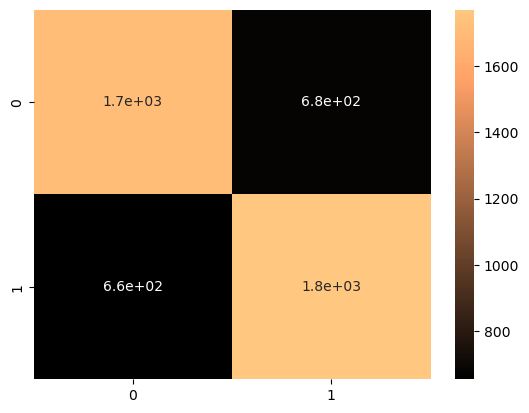

In [59]:
from sklearn.metrics import confusion_matrix

y_pred_xgb = xgb.predict(X_test_enc)
cm = confusion_matrix(y_test, y_pred_xgb)
acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
print("the accuracy of XGBoost model", acc)
sns.heatmap(cm, annot=True, cmap=plt.cm.copper)

xgb_acc = (cm.ravel()[0]+cm.ravel()[3])/sum(cm.ravel())
xgb_TPR = cm.ravel()[3]/(cm.ravel()[3]+cm.ravel()[2])
xgb_FPR = cm.ravel()[1]/(cm.ravel()[1]+cm.ravel()[0])
xgb_PRE = cm.ravel()[3]/(cm.ravel()[1]+cm.ravel()[3])

### Model Performance

In [60]:
baseline_acc = np.sum(y_test == 0) / len(y_test)
baseline_TPR = 0
baseline_FPR = 0
baseline_PRE = 0

In [61]:
from sklearn.metrics import roc_curve, roc_auc_score

auc_baseline = roc_auc_score(y_test, np.zeros(len(y_test)))
auc_lr = roc_auc_score(y_test, y_pred_log)
auc_dt = roc_auc_score(y_test, y_pred_dtc)
auc_rf = roc_auc_score(y_test, y_pred_rf)
auc_xgb = roc_auc_score(y_test, y_pred_xgb)

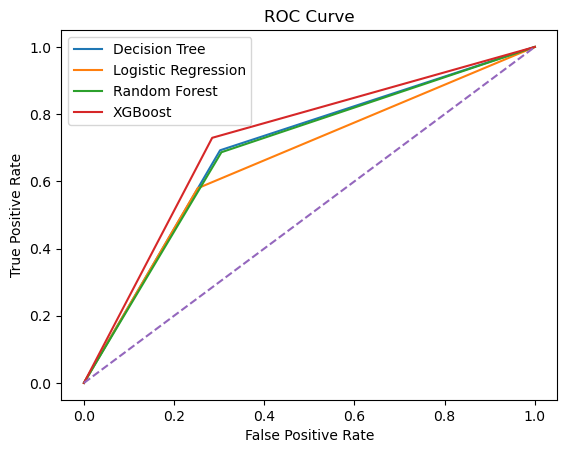

In [65]:
# produce a performance table
from sklearn.metrics import roc_curve
model_results = {
    'Decision Tree': y_pred_dtc,
    'Logistic Regression': y_pred_log,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}
def plot_roc(models):
    for key, value in models.items():
        fpr, tpr, _ = roc_curve(y_test, value)
        sns.lineplot(x=fpr, y=tpr, label=key)

    ax = sns.lineplot(x=[0,0.5, 1], y=[0,0.5, 1])
    ax.lines[len(models)].set_linestyle("--")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve')
plot_roc(model_results)

In [66]:
comparison_data = {'Baseline':[baseline_acc,baseline_TPR,baseline_FPR, baseline_PRE, auc_baseline],
                   'Logistic Regression':[log_acc,log_TPR,log_FPR, log_PRE, auc_lr],
                   'Decision Tree Classifier':[dtc_acc,dtc_TPR,dtc_FPR,dtc_PRE, auc_dt],
                   'Random Forest':[rf_acc,rf_TPR, rf_FPR,rf_PRE, auc_rf],
                  'XGBoost':[xgb_acc,xgb_TPR, xgb_FPR,xgb_PRE, auc_xgb]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR','PRE','AUC-ROC']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table

,Accuracy,TPR,FPR,PRE,AUC-ROC
Baseline,0.496470,0.000000,0.000000,0.000000,0.500000
Logistic Regression,0.662998,0.579381,0.252196,0.699701,0.663593
Decision Tree Classifier,0.695183,0.692371,0.301966,0.699292,0.695203
Random Forest,0.690822,0.686598,0.304893,0.695489,0.690852
XGBoost,0.722591,0.729485,0.284400,0.722336,0.722542


Above all, the Xgboost and Random Forest model has a higher likelihood of predicting whether a given transaction will be fraudulent or not. 

The tree classification model is more easily interpretable than other model, and it selects the significant variables for us. They can be easily visualized as a tree-like structure, which makes it easy for others to understand and interpret the results. Additionally, the model can identify the most important features that affect the outcome, which can help make informed decisions about which factors to focus on to improve business.

Summary: In the modeling part, I use the random undersampled method to resolve the imbalanced sample problem and then impute the missing value in the original dataset in ordee to fit some machine learning classification models. Finally, I could use the processed data to train different models and compare their performance. 

Further, I could use the SMOTE method to produce oversampled dataset to resolve the imbalanced sample problem and compare with undersample dataset，or use cost-sensitive learning. Besides, I could train more advanced model, like neural network, ..., which might predict better.